# Clients Clustering Car Doctor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("D:/ALEXANDER/Desktop/CAR DOCTOR/CLASSIFICATION_DATASET.csv")

In [3]:
df.head()

,idCliente,NombreCliente,idSexo,ContactoCliente,idCategoriaCliente,idVehiculo,Placas,idCliente.1,IdAuto,idServicio,...,EstadoServicio,Publicidad,idVenta,PrecioFinal,CostoTotal,Ganancia,idServicio.1,FECHA,EstadoVenta,MetodoPago
0,31,EDGAR CARDOSA,1,3322885340,1,28,DRD428E,31,21.0,95,...,FINALIZADO,GOOGLE ADS,104,2530.0,593.0,2590.0,95,2024-04-06,PAGADO,TARJETA
1,31,EDGAR CARDOSA,1,3322885340,1,28,DRD428E,31,21.0,186,...,FINALIZADO,NINGUNA,197,9830.0,5571.0,NaN,186,2024-05-09,PAGADO,TARJETA
2,46,JANET VERDURAS,2,33,1,46,JV74313,46,15974.0,15,...,FINALIZADO,NINGUNA,16,2700.0,822.0,NaN,15,2024-03-08,PAGADO,EFECTIVO
3,48,PASTO SINTÉTICO,1,33,2,48,JY36634,48,4104.0,199,...,FINALIZADO,NINGUNA,210,8500.0,2899.0,NaN,199,2024-05-16,PAGADO,EFECTIVO
4,48,PASTO SINTÉTICO,1,33,2,48,JY36634,48,4104.0,266,...,FINALIZADO,NINGUNA,279,1200.0,431.0,NaN,266,2024-06-12,PAGADO,EFECTIVO


# 2. Clean and Transform Data

In [4]:
df2 = df[["idCliente", "idSexo", "idCategoriaCliente", "PrecioFinal"]]
df2.head()

,idCliente,idSexo,idCategoriaCliente,PrecioFinal
0,31,1,1,2530.0
1,31,1,1,9830.0
2,46,2,1,2700.0
3,48,1,2,8500.0
4,48,1,2,1200.0


In [5]:
# The idCliente 6 is used for general public and It should be dropped for this analysis

df_filtered = df2[df2["idCliente"]!=6]
df_filtered.head()

,idCliente,idSexo,idCategoriaCliente,PrecioFinal
0,31,1,1,2530.0
1,31,1,1,9830.0
2,46,2,1,2700.0
3,48,1,2,8500.0
4,48,1,2,1200.0


In [6]:
df_filtered.isnull().sum()

idCliente             0
idSexo                0
idCategoriaCliente    0
PrecioFinal           8
dtype: int64

In [7]:
df_filtered.dropna()

,idCliente,idSexo,idCategoriaCliente,PrecioFinal
0,31,1,1,2530.0
1,31,1,1,9830.0
2,46,2,1,2700.0
3,48,1,2,8500.0
4,48,1,2,1200.0
...,...,...,...,...
286,254,1,1,11400.0
287,255,2,1,4600.0
288,256,1,1,1850.0
289,257,1,1,300.0


In [8]:
df_grouped = df_filtered.groupby("idCliente").agg(
    NumeroVentas=("idCliente", "size"),
    TotalVentas =("PrecioFinal", "sum")
).reset_index()

In [9]:
df_grouped.head()

,idCliente,NumeroVentas,TotalVentas
0,7,1,550.0
1,24,8,20927.0
2,29,5,11900.0
3,30,3,15901.0
4,31,2,12360.0


In [10]:
df_final = df_grouped.drop(columns=["idCliente"])
df_final.head()

,NumeroVentas,TotalVentas
0,1,550.0
1,8,20927.0
2,5,11900.0
3,3,15901.0
4,2,12360.0


In [11]:
escalator = MinMaxScaler().fit(df_final.values)

clients = pd.DataFrame(escalator.transform(df_final.values),
                      columns = ["NumeroVentas", "TotalVentas"])

clients.head()

,NumeroVentas,TotalVentas
0,0.000000,0.014285
1,0.538462,0.543516
2,0.307692,0.309067
3,0.153846,0.412981
4,0.076923,0.321014


In [41]:
kmeans = KMeans(n_clusters = 3,).fit(clients.values)

C:\Users\52332\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\52332\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
clients["Cluster"] = kmeans.labels_
clients.head()

,NumeroVentas,TotalVentas,Cluster
0,0.000000,0.014285,0
1,0.538462,0.543516,2
2,0.307692,0.309067,1
3,0.153846,0.412981,1
4,0.076923,0.321014,1


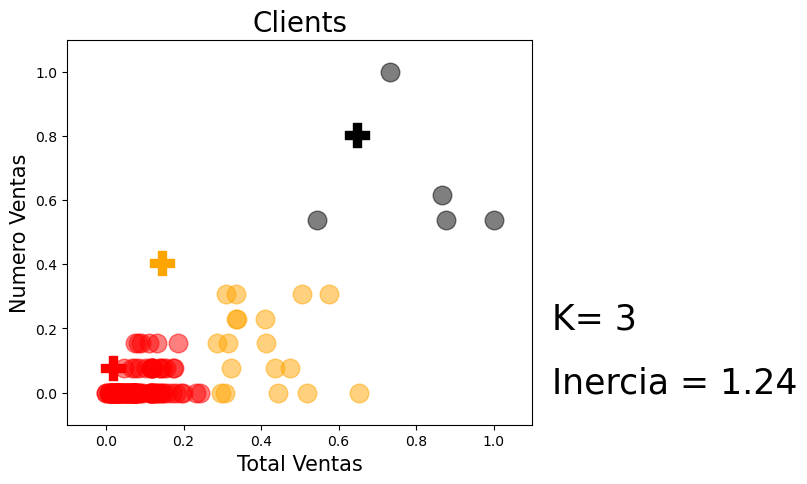

In [43]:
plt.figure(figsize=(6,5),dpi=100)

colors = ["red", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clients[clients["Cluster"]==cluster]["TotalVentas"],
                clients[clients["Cluster"]==cluster]["NumeroVentas"],
                marker="o", s=180, color=colors[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colors[cluster])

plt.title("Clients", fontsize=20)
plt.xlabel("Total Ventas", fontsize=15)
plt.ylabel("Numero Ventas", fontsize=15)
plt.text(1.15,0.2,"K= %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15,0,"Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

del clients["Cluster"]

# Elbow Method

C:\Users\52332\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\52332\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\52332\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\52332\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

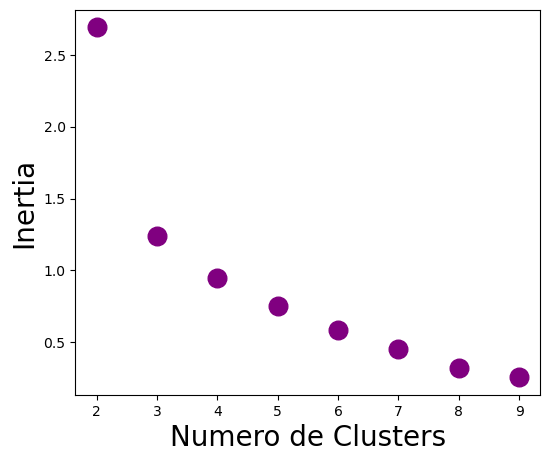

In [40]:
inertia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(clients.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(6,5), dpi=100)
plt.scatter(range(2,10), inertia, marker="o", s=180, color="purple")
plt.xlabel("Numero de Clusters", fontsize=20)
plt.ylabel("Inertia", fontsize=20)
plt.show()